In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("dubai_properties.csv")
data.head(2)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372


d:\ProgramData\anaconda3\envs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


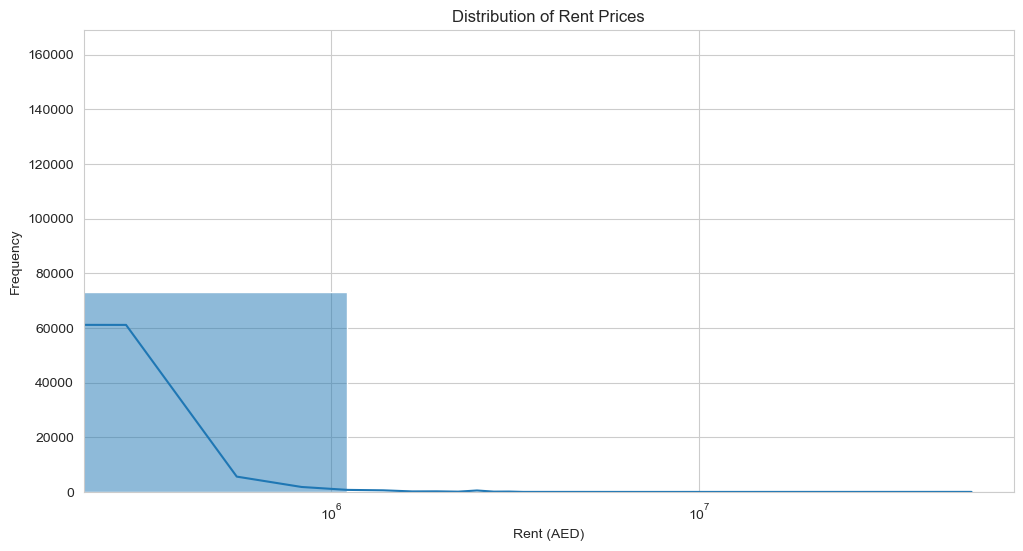

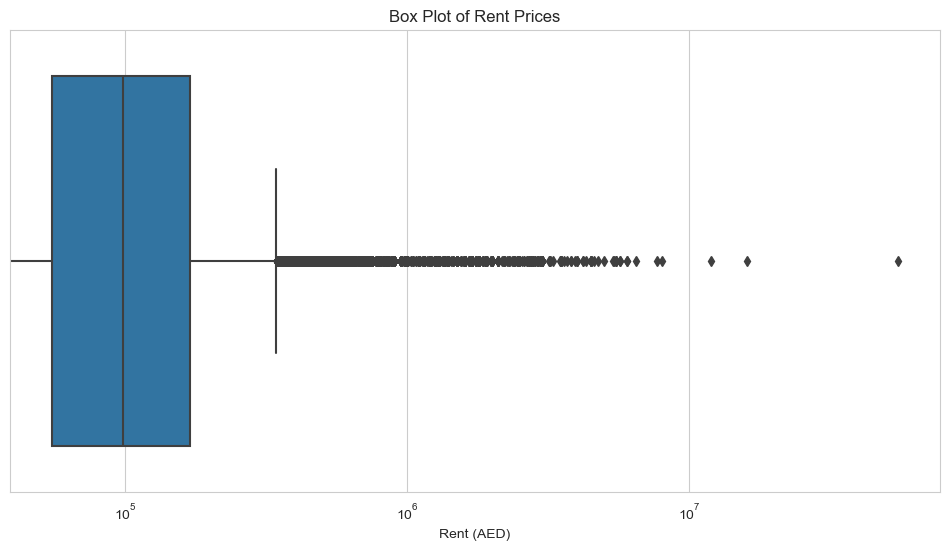

In [3]:
import matplotlib.pyplot as plt

# 设置plot风格
sns.set_style("whitegrid")

# 租金价格直方图
plt.figure(figsize=(12, 6))
sns.histplot(data['Rent'], bins=50, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent (AED)')
plt.ylabel('Frequency')
plt.xscale('log')  # 由于租金价格差异较大，使用对数尺度
plt.show()

# 租金价格方框图
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Rent'])
plt.title('Box Plot of Rent Prices')
plt.xlabel('Rent (AED)')
plt.xscale('log')  # 使用对数刻度来更好地可视化分布
plt.show()

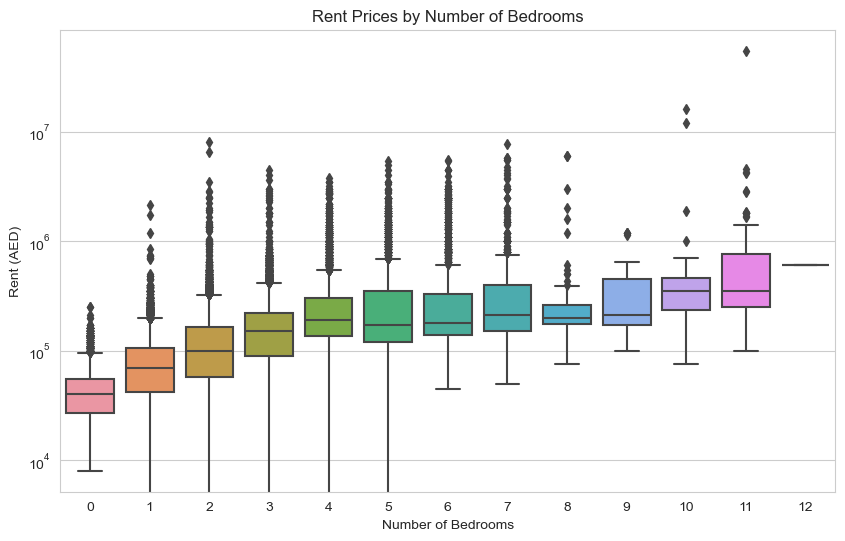

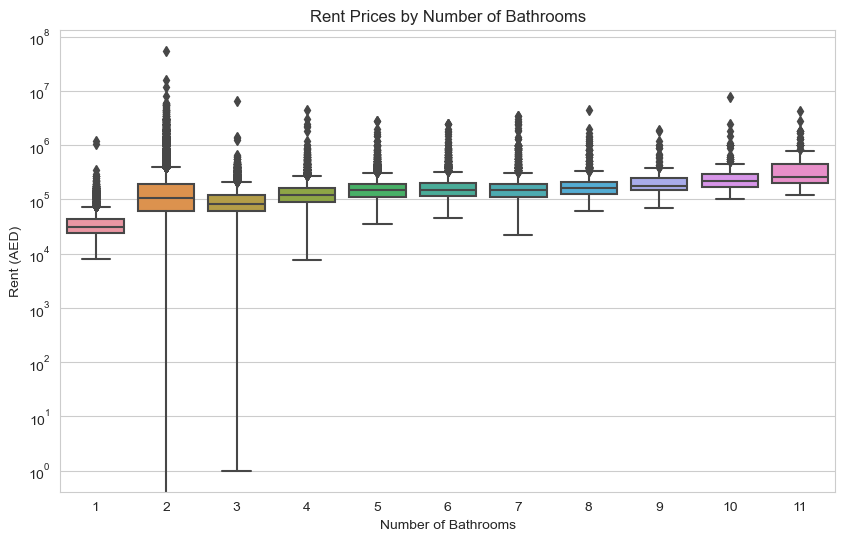

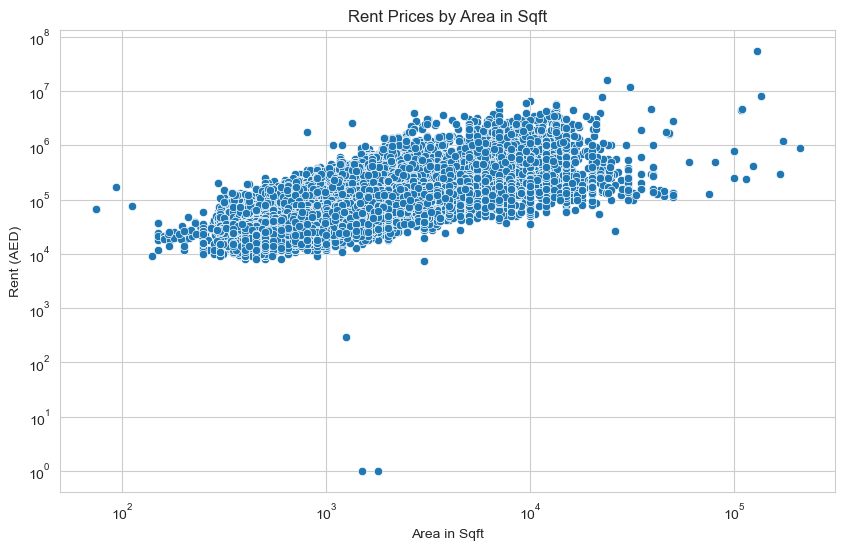

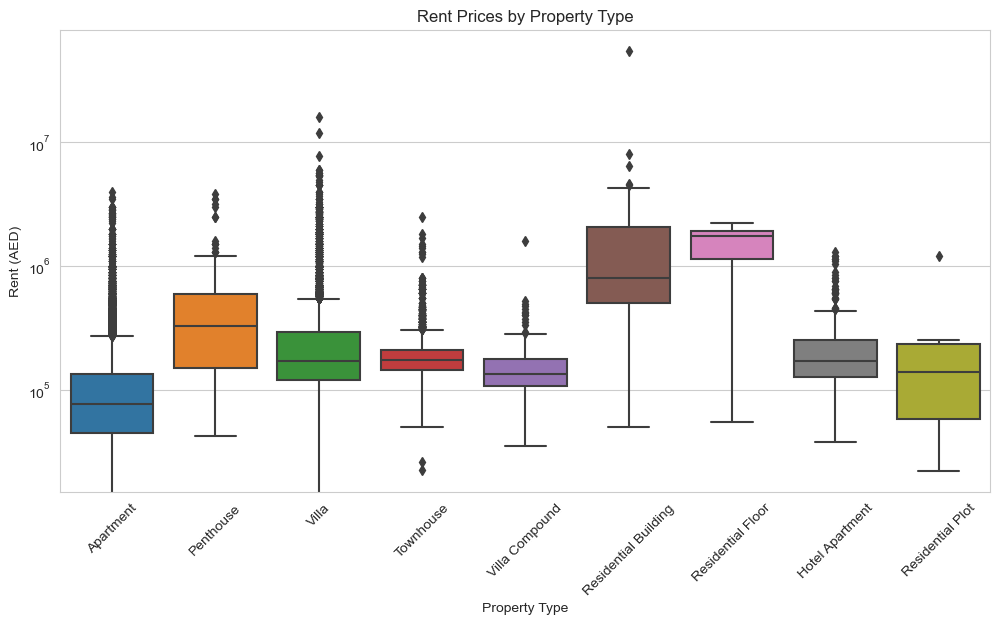

In [4]:
# 分析租金与卧室数量的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beds', y='Rent', data=data)
plt.title('Rent Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# 分析租金与浴室数量的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='Baths', y='Rent', data=data)
plt.title('Rent Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# 分析租金与面积的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=data)
plt.title('Rent Prices by Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent (AED)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# 分析租金与物业类型的关系
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rent', data=data)
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

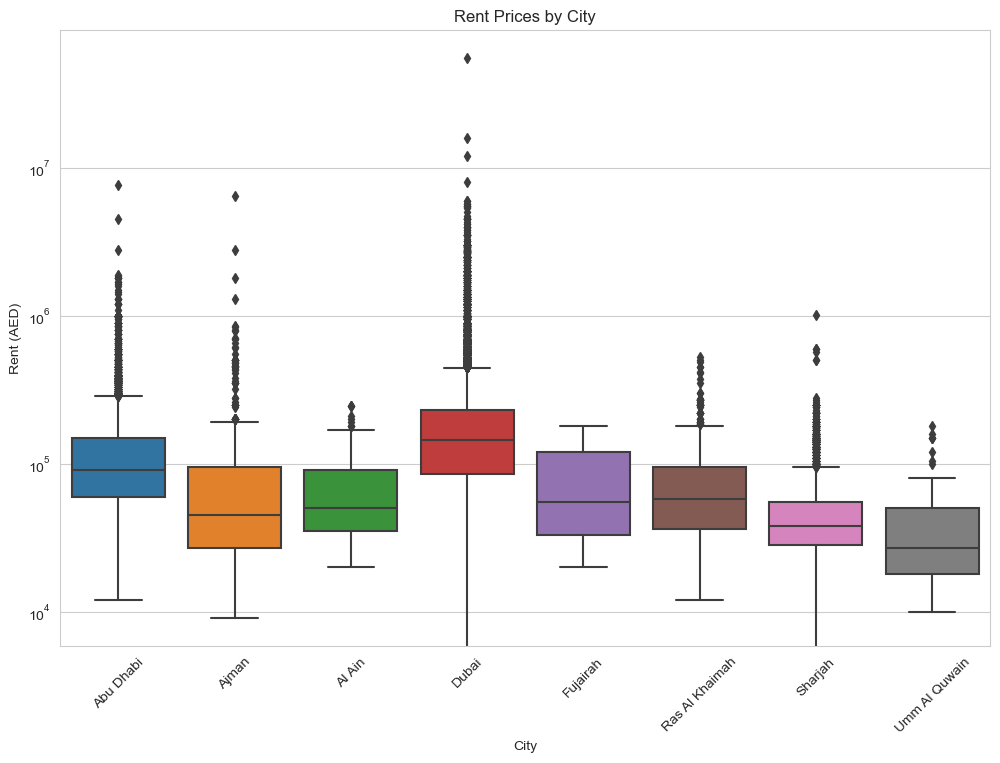

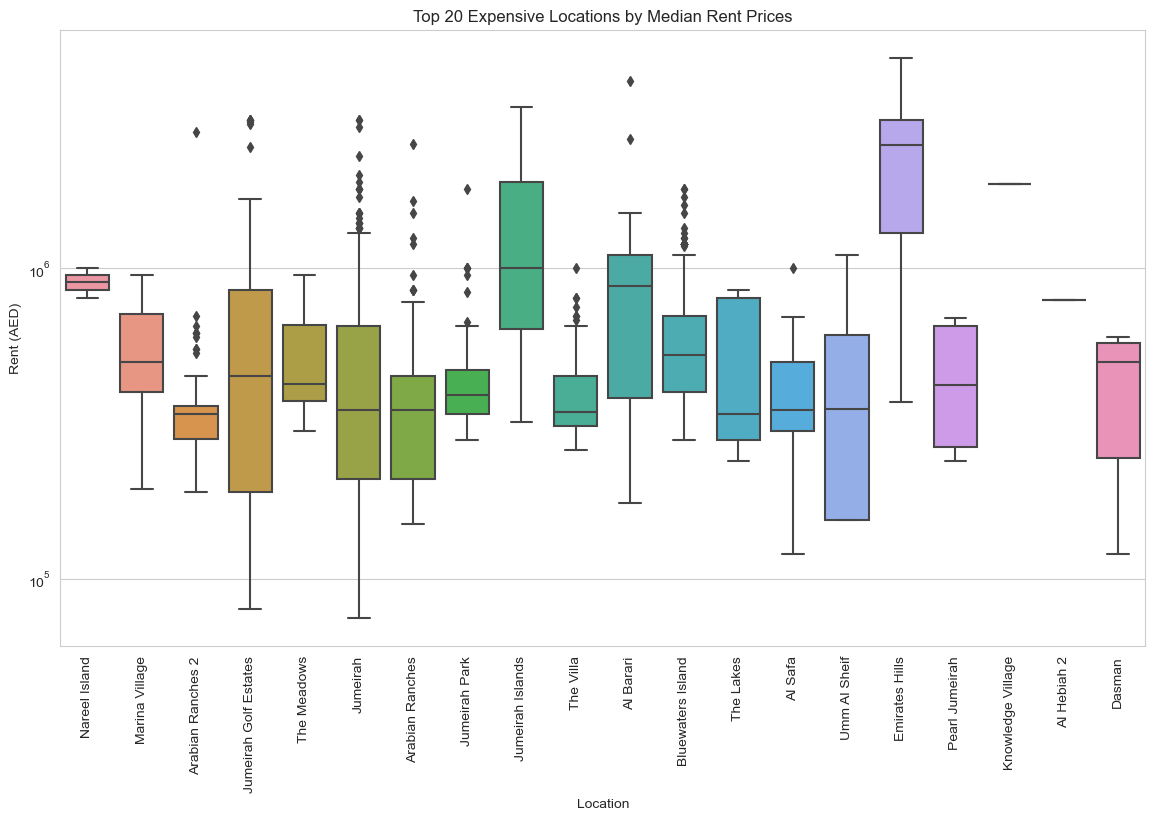

In [5]:
# 分析不同城市的租金差异
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=data)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# 分析城市中不同地点的租金差异
# 由于可能有大量的地点，我们只显示租金中位数排名前20位的地点
top_locations = data.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = data[data['Location'].isin(top_locations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Least Expensive Areas for Renting (Top 10):
Location
Al Raudah                          12000.0
Hamriyah Free Zone                 12000.0
Maysaloon                          13000.0
Masfoot                            13500.0
Al Hawiyah                         15000.0
Al Yarmook                         15000.0
Al Rass                            16000.0
Al Bataeh                          16000.0
Al Humaid City                     16000.0
Emirates Modern Industrial Area    16000.0
Name: Rent, dtype: float64

Most Expensive Areas for Renting (Top 10):
Location
Jumeirah Golf Estates     450000.0
Marina Village            500000.0
Dasman                    500000.0
Bluewaters Island         527500.0
Al Hebiah 2               790000.0
Al Barari                 875000.0
Nareel Island             900000.0
Jumeirah Islands         1000000.0
Knowledge Village        1859550.0
Emirates Hills           2499000.0
Name: Rent, dtype: float64


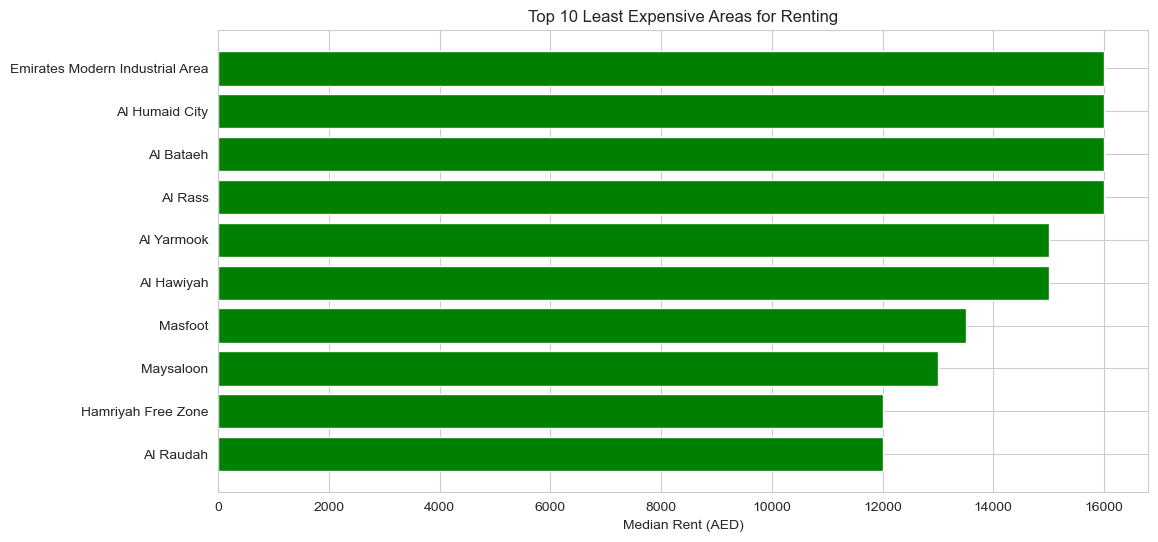

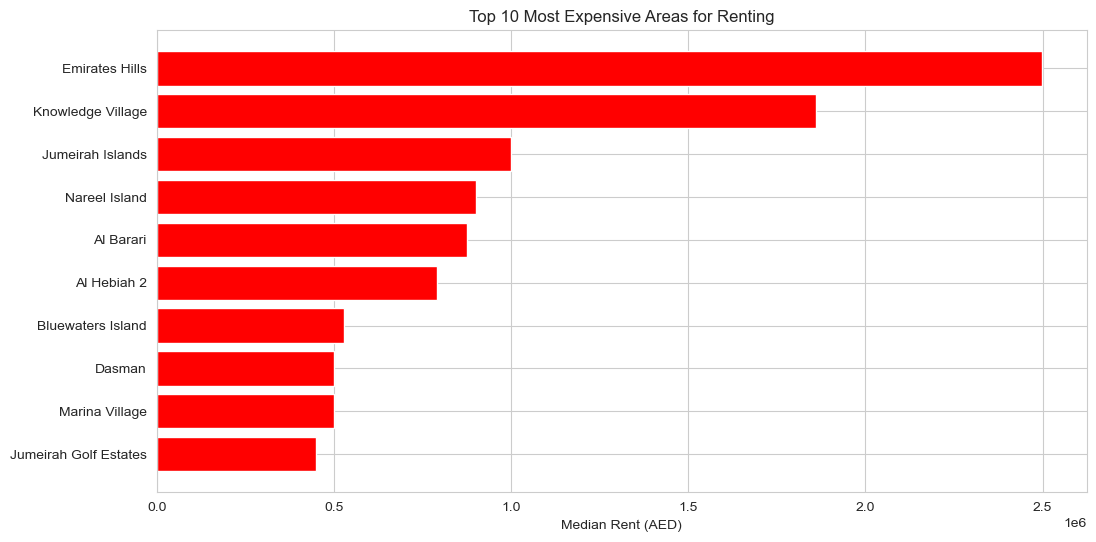

In [6]:
# 确定租金最贵和最便宜的地区
# 计算每个位置的租金中位数并对其进行排序
location_rent_stats = data.groupby('Location')['Rent'].median().sort_values()

# 显示最便宜的区域
print("Least Expensive Areas for Renting (Top 10):")
print(location_rent_stats.head(10))

# 显示最昂贵的区域
print("\nMost Expensive Areas for Renting (Top 10):")
print(location_rent_stats.tail(10))

# 最便宜的地区
plt.figure(figsize=(12, 6))
least_expensive = location_rent_stats.head(10)
plt.barh(least_expensive.index, least_expensive.values, color='green')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Least Expensive Areas for Renting')
plt.show()

# 最昂贵的地区
plt.figure(figsize=(12, 6))
most_expensive = location_rent_stats.tail(10)
plt.barh(most_expensive.index, most_expensive.values, color='red')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Most Expensive Areas for Renting')
plt.show()

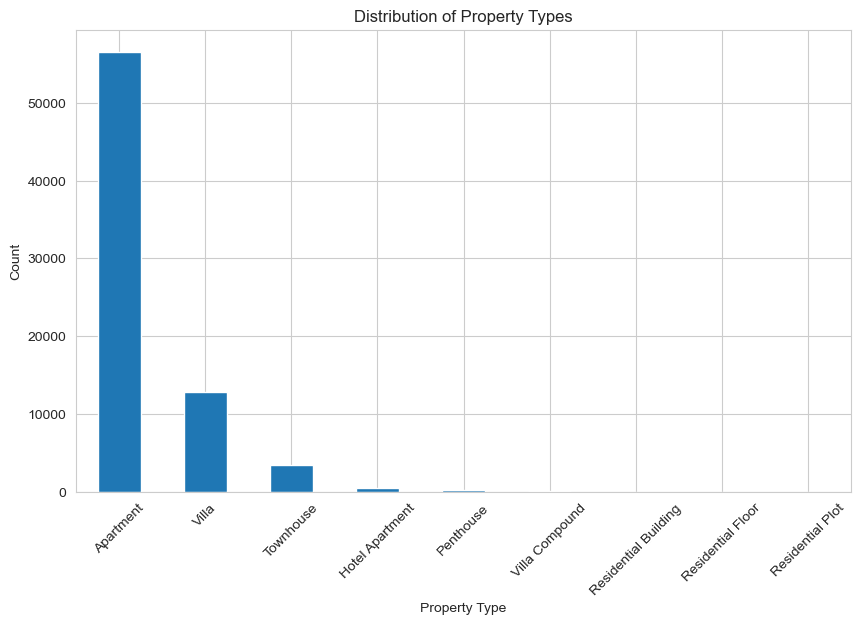

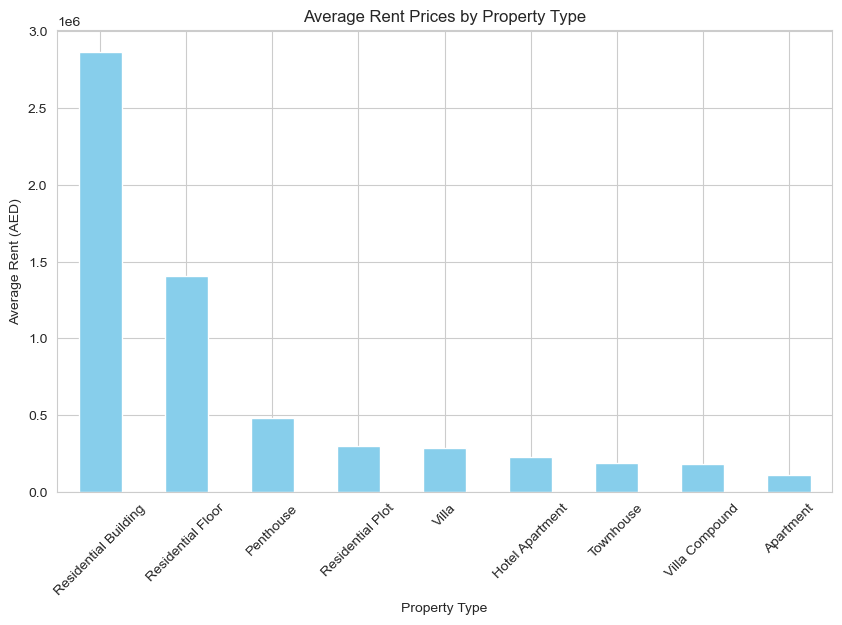

In [7]:
# 分析物业类型的分布
property_type_counts = data['Type'].value_counts()
plt.figure(figsize=(10, 6))
property_type_counts.plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 比较不同物业类别的平均租金
average_rent_by_type = data.groupby('Type')['Rent'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_rent_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent (AED)')
plt.xticks(rotation=45)
plt.show()

d:\ProgramData\anaconda3\envs\venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


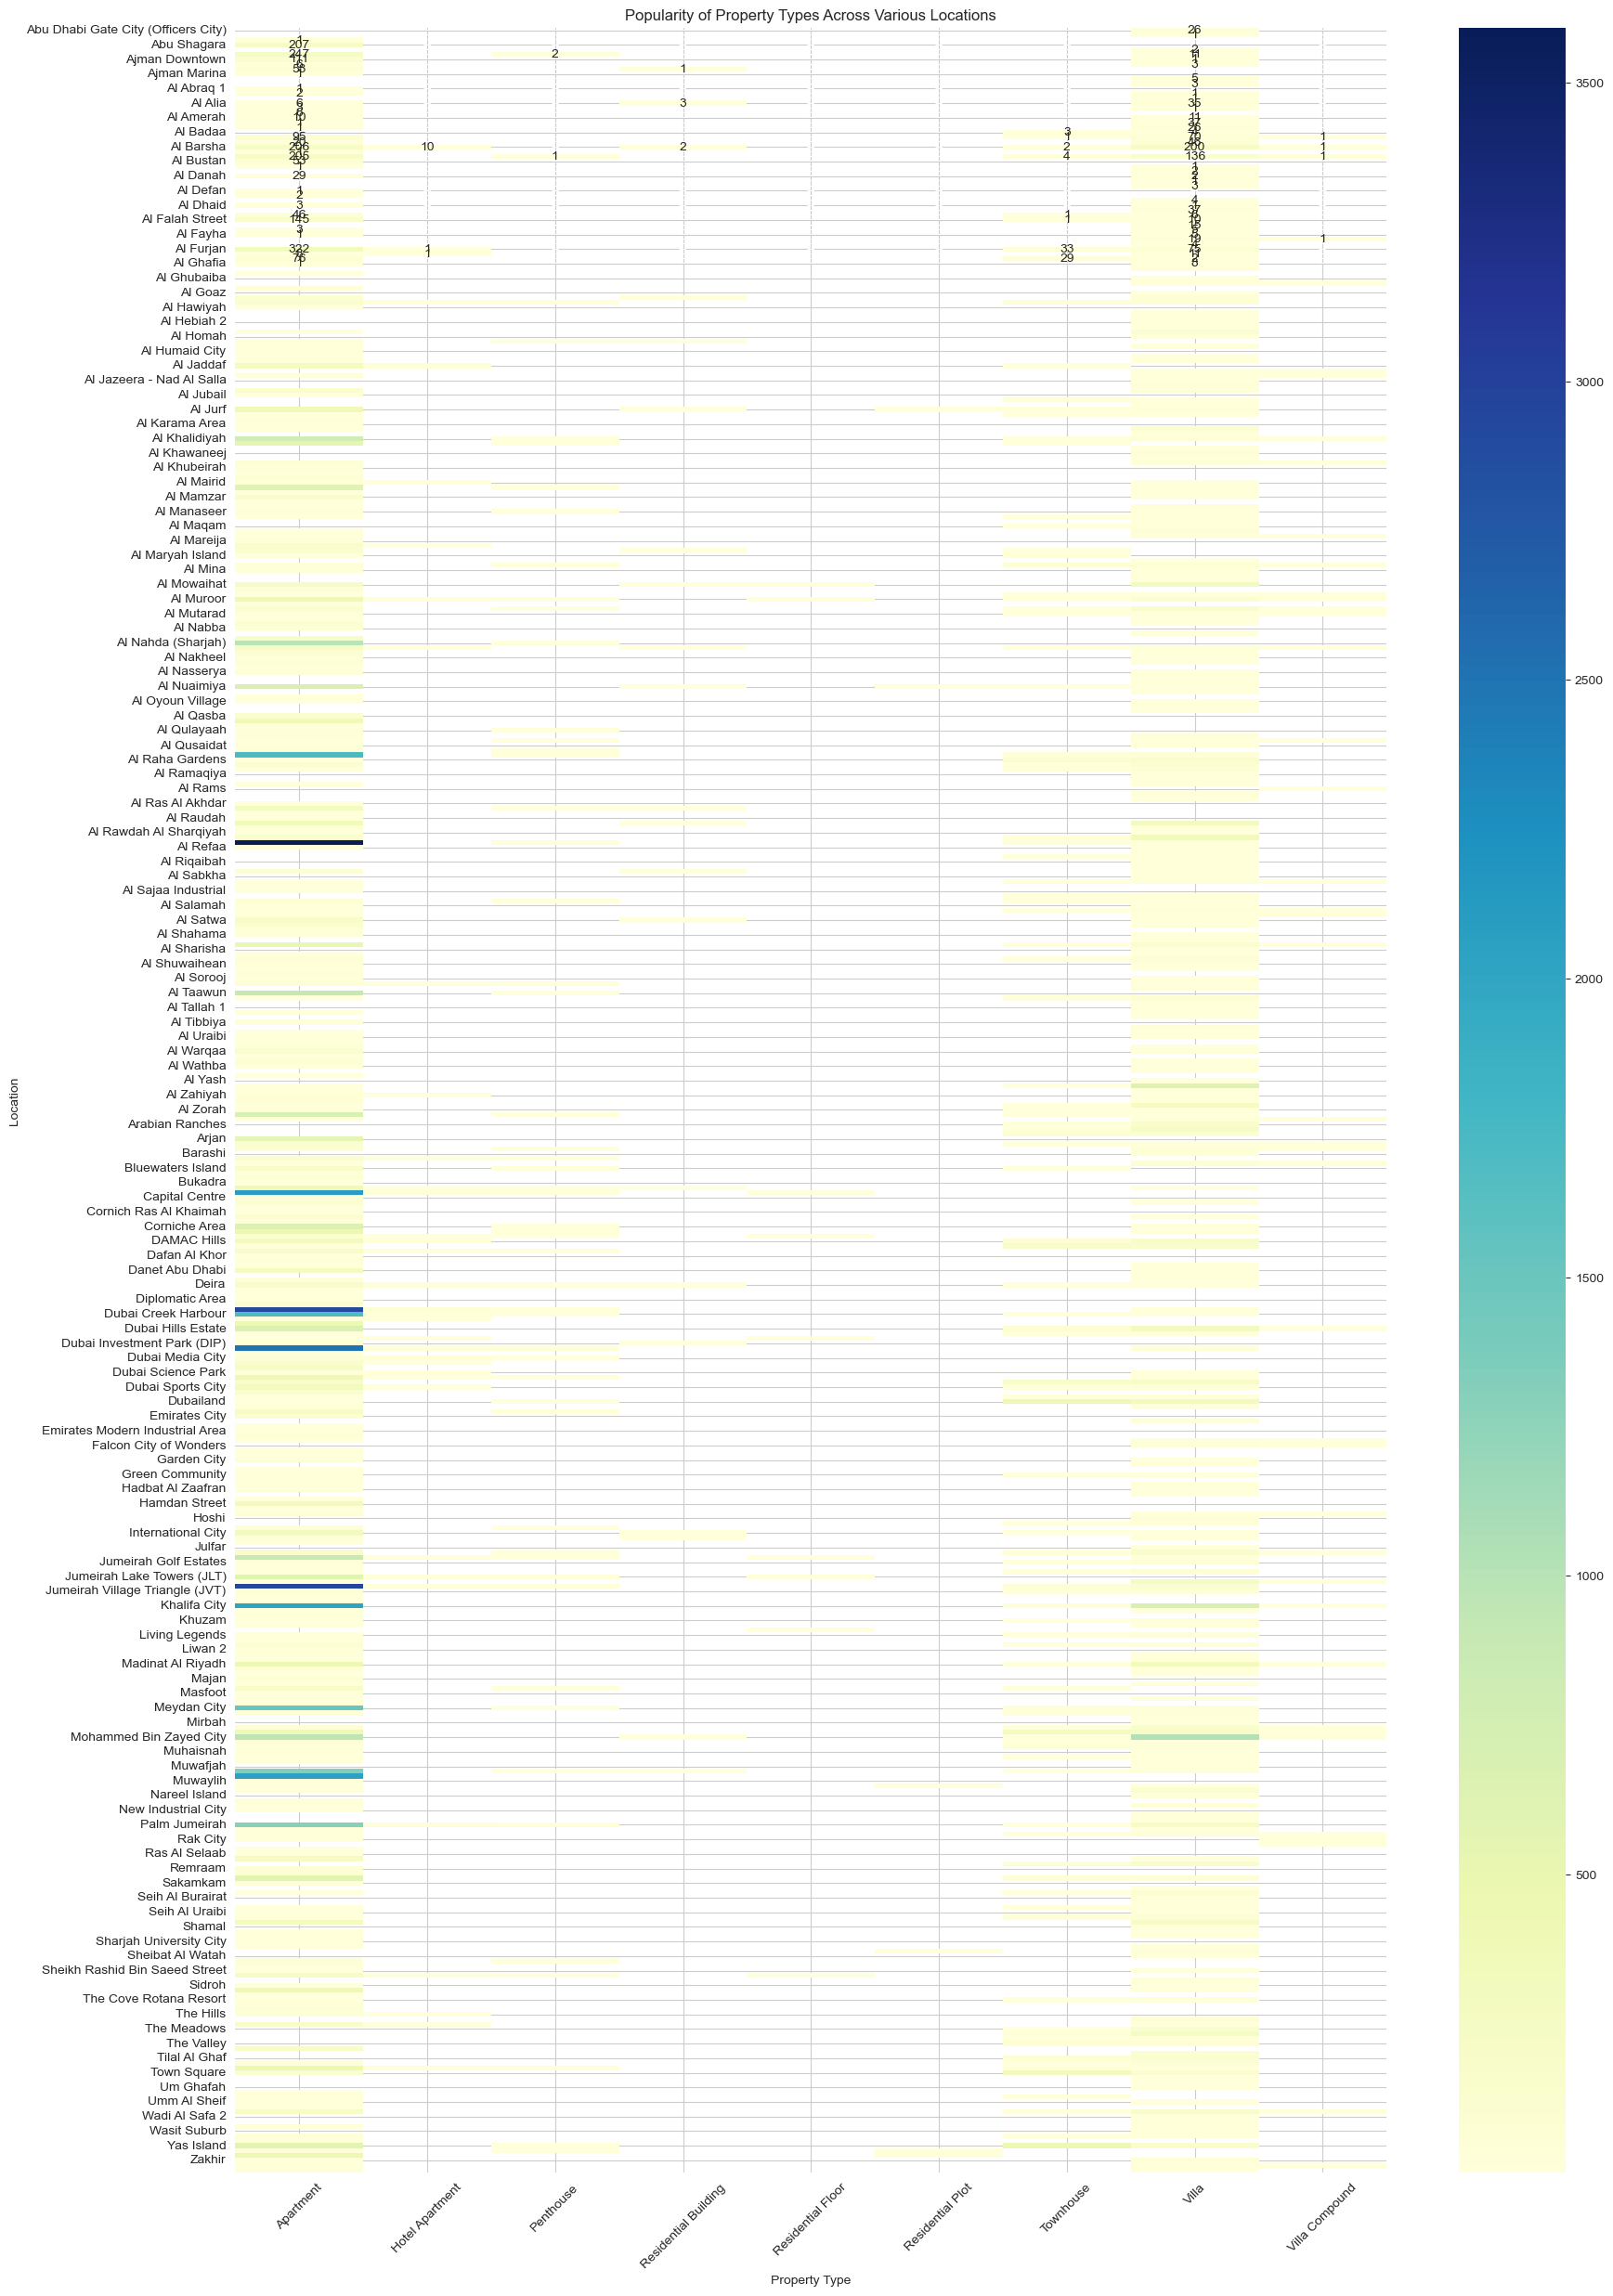

In [8]:
# 按“位置”和“类型”分组数据，以查看每个位置中每种属性类型的计数
property_type_location = data.groupby(['Location', 'Type']).size().unstack(fill_value=0)

# 将'0'替换为'NaN'
property_type_location.replace(0, np.nan, inplace=True)

# 绘制数据
plt.figure(figsize=(20, 30))
sns.heatmap(property_type_location, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Popularity of Property Types Across Various Locations')
plt.xlabel('Property Type')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

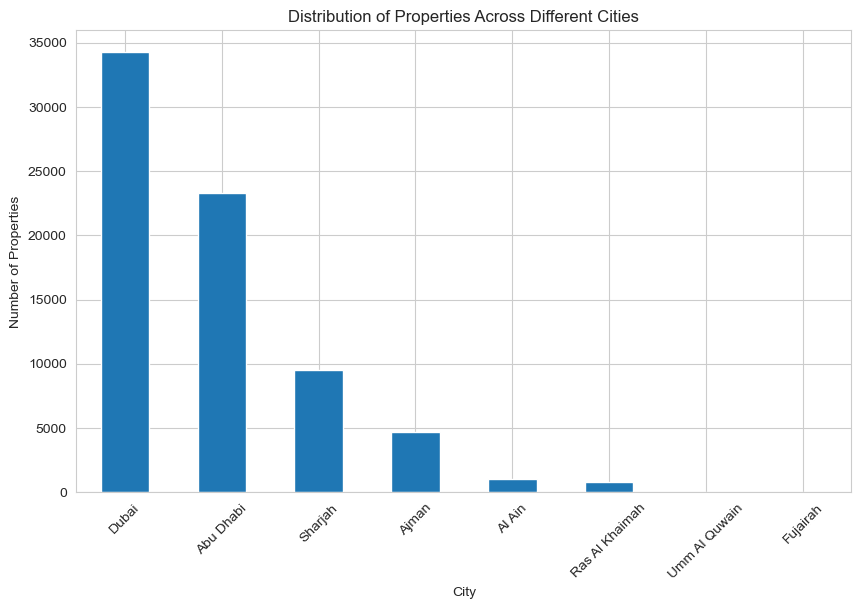

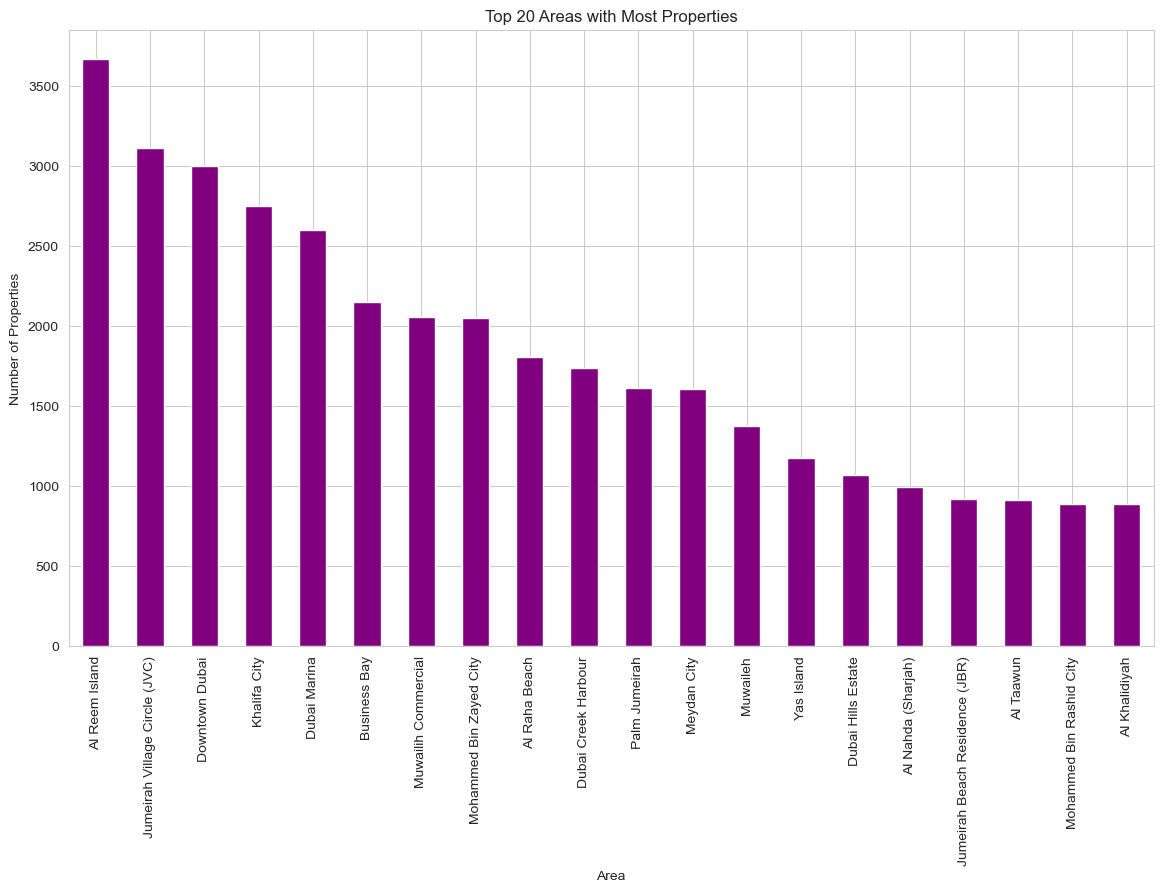

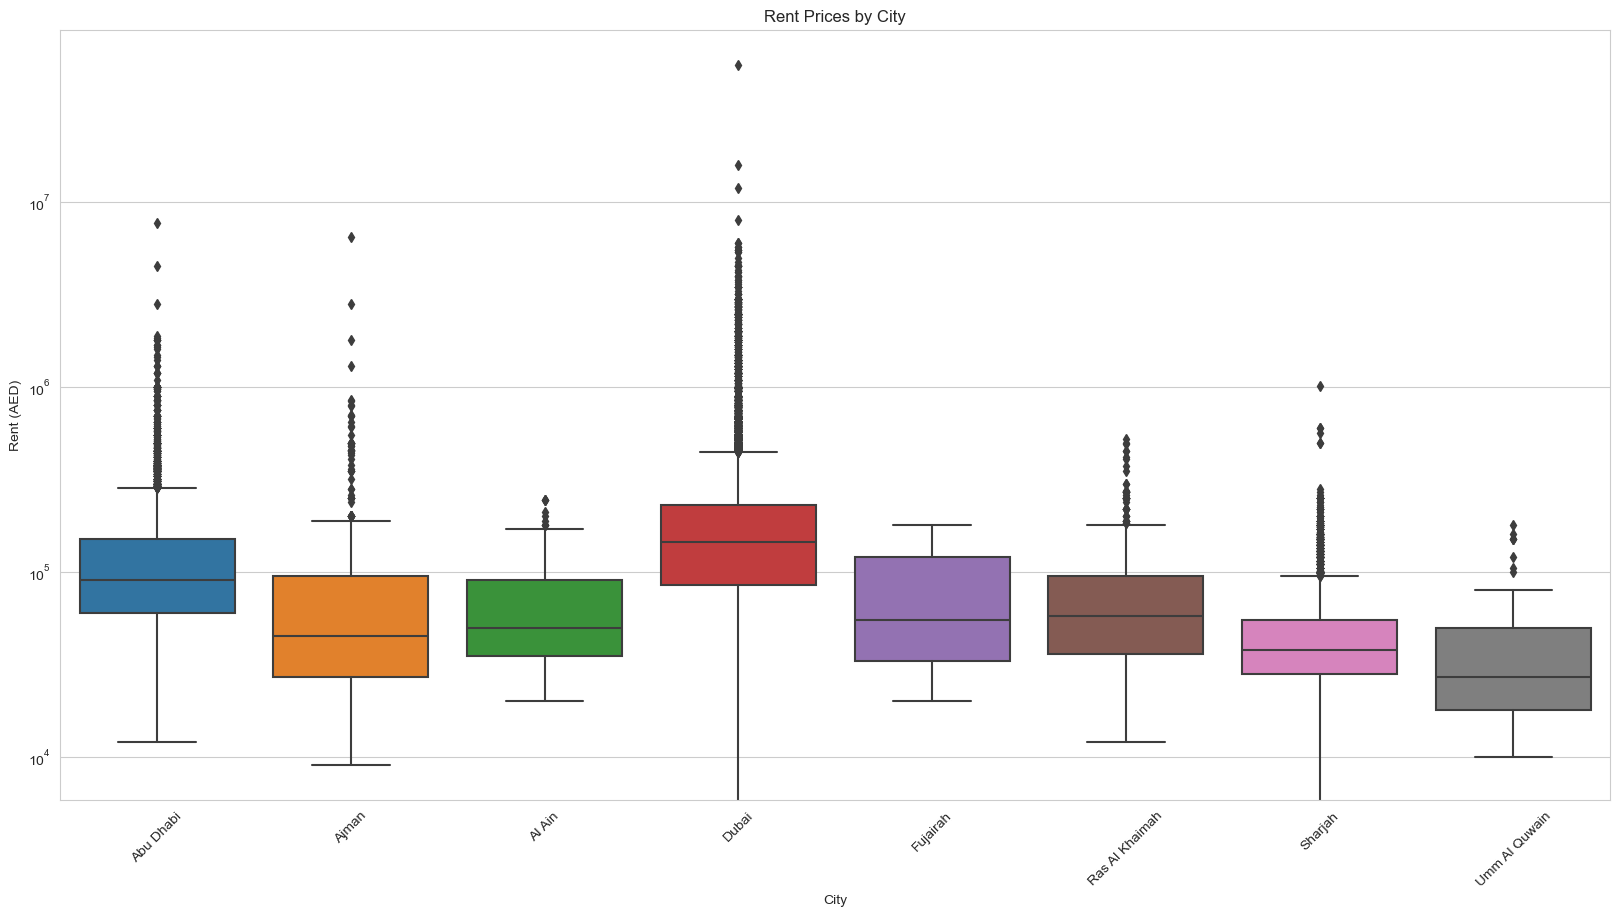

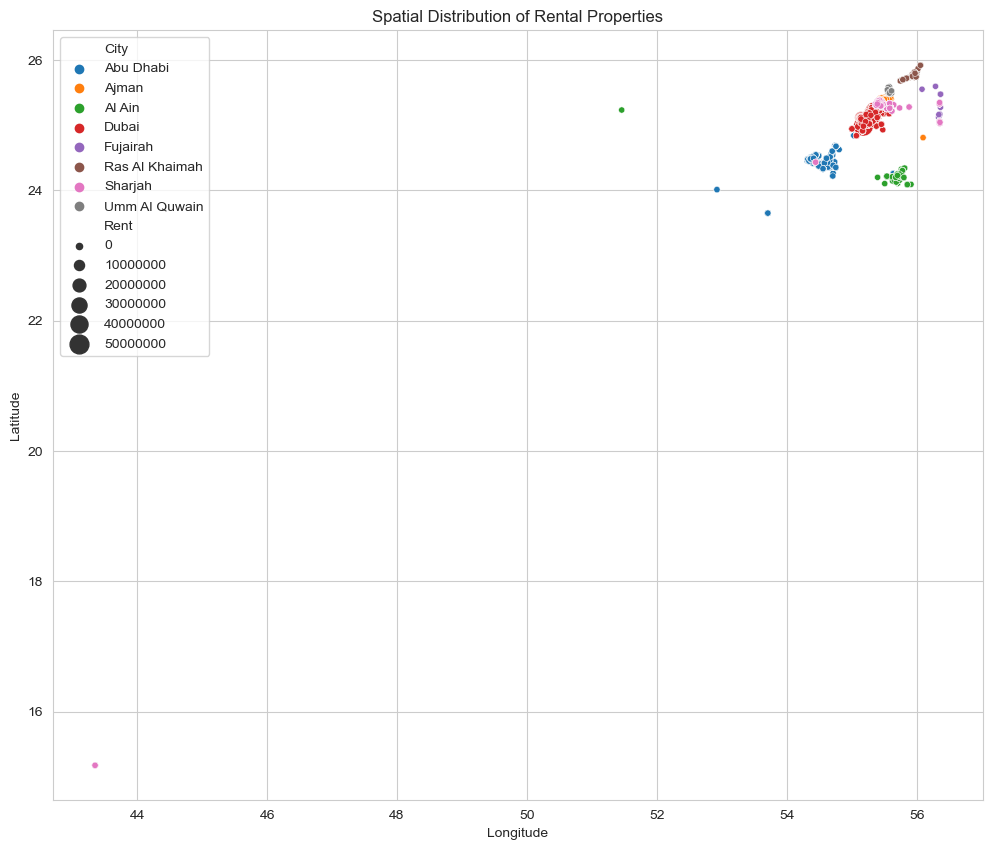

In [9]:
# 分析租赁物业在不同城市和地区的分布

# 不同城市的房产分布情况
city_counts = data['City'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Distribution of Properties Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

# 属性在不同区域的分布
area_counts = data['Location'].value_counts().head(20)  # Top 20 areas
plt.figure(figsize=(14, 8))
area_counts.plot(kind='bar', color='purple')
plt.title('Top 20 Areas with Most Properties')
plt.xlabel('Area')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.show()

# 分析地理位置与租金价格的关系
plt.figure(figsize=(20, 10))
sns.boxplot(x='City', y='Rent', data=data)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# 使用纬度和经度可视化出租物业的空间分布
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', size='Rent', sizes=(20, 200), data=data)
plt.title('Spatial Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

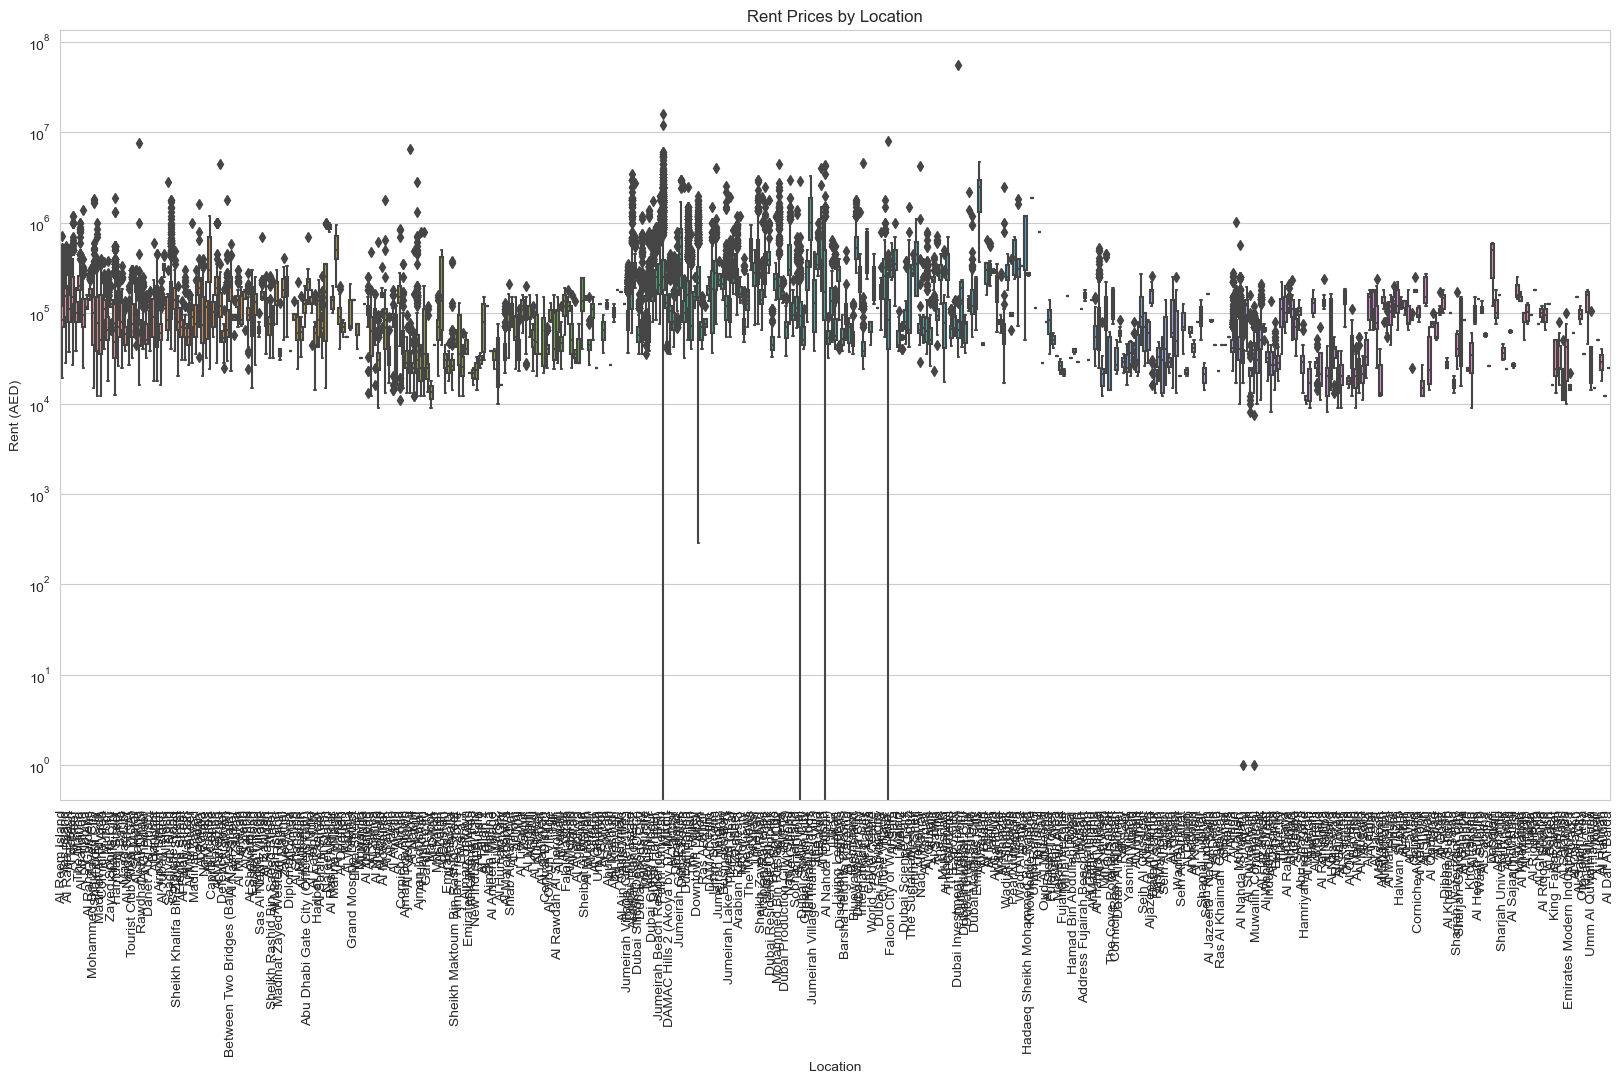

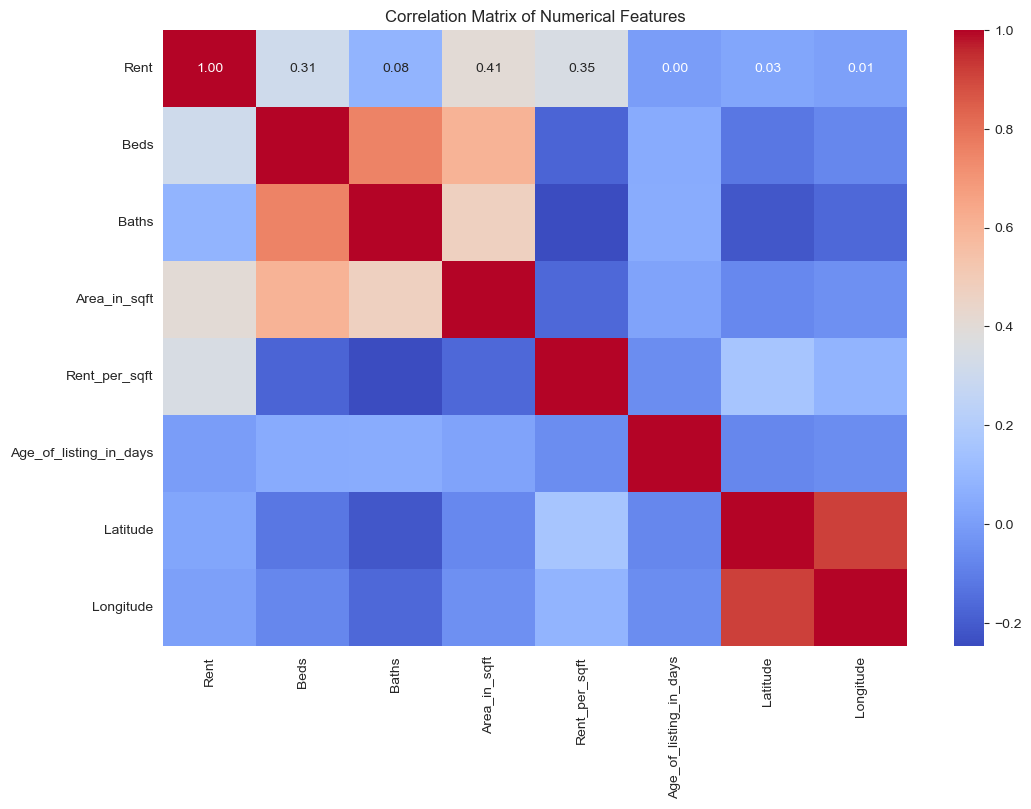

In [10]:
# 分析地理位置与租金价格的关系
plt.figure(figsize=(20, 10))
sns.boxplot(x='Location', y='Rent', data=data)
plt.title('Rent Prices by Location')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# 分析数值特征与租金价格的相关性
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

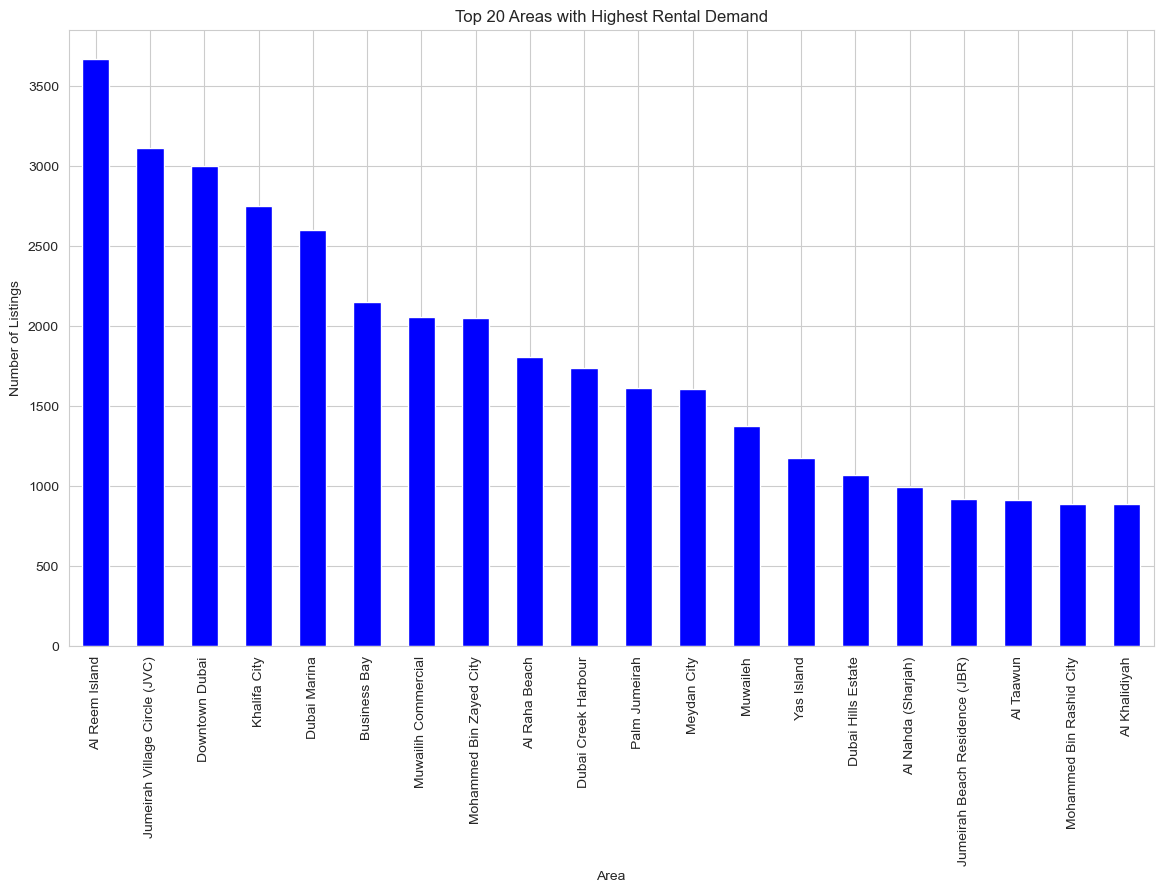

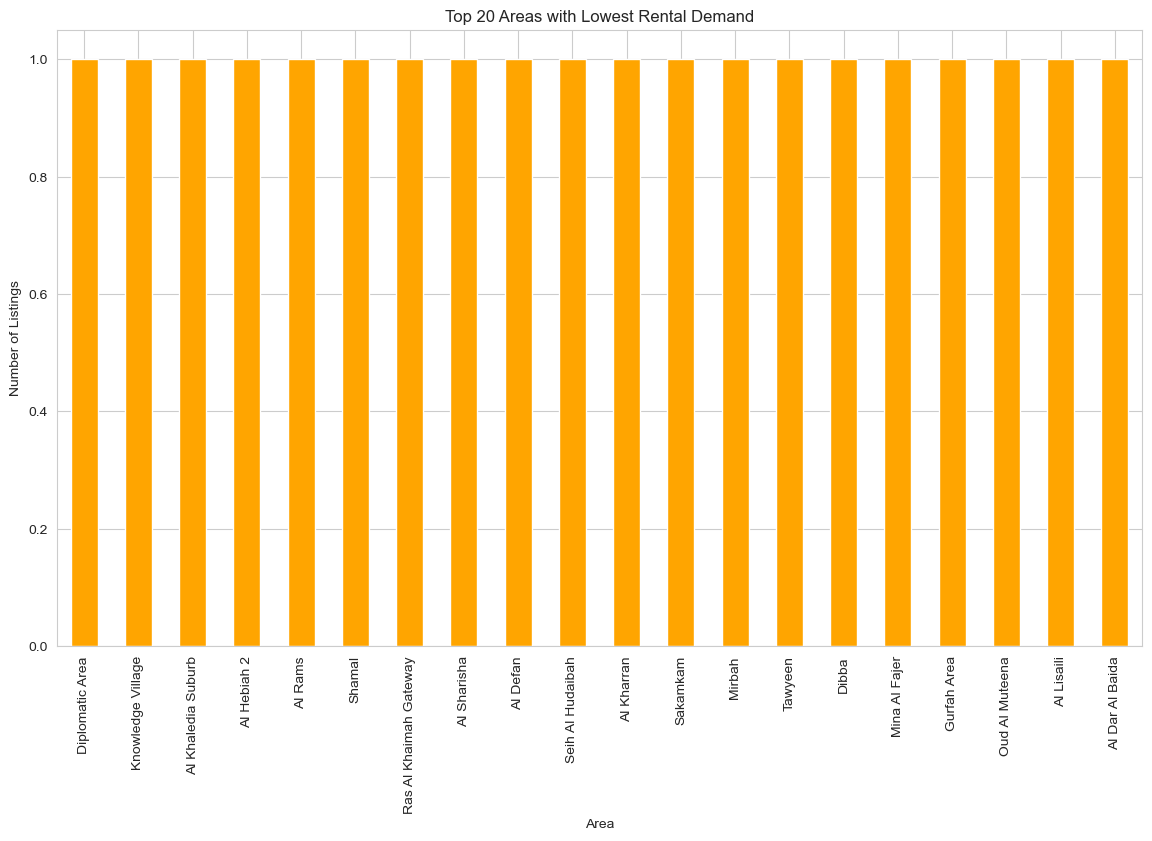

In [11]:
# 根据房源数量分析租赁需求高、低的区域
area_demand = data['Location'].value_counts()

# 绘制租金需求最高的前20个地区
plt.figure(figsize=(14, 8))
area_demand.head(20).plot(kind='bar', color='blue')
plt.title('Top 20 Areas with Highest Rental Demand')
plt.xlabel('Area')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

# 绘制租金需求最低的前20个地区
plt.figure(figsize=(14, 8))
area_demand.tail(20).plot(kind='bar', color='orange')
plt.title('Top 20 Areas with Lowest Rental Demand')
plt.xlabel('Area')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_17620\3790896329.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
d:\ProgramData\anaconda3\envs\venv\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


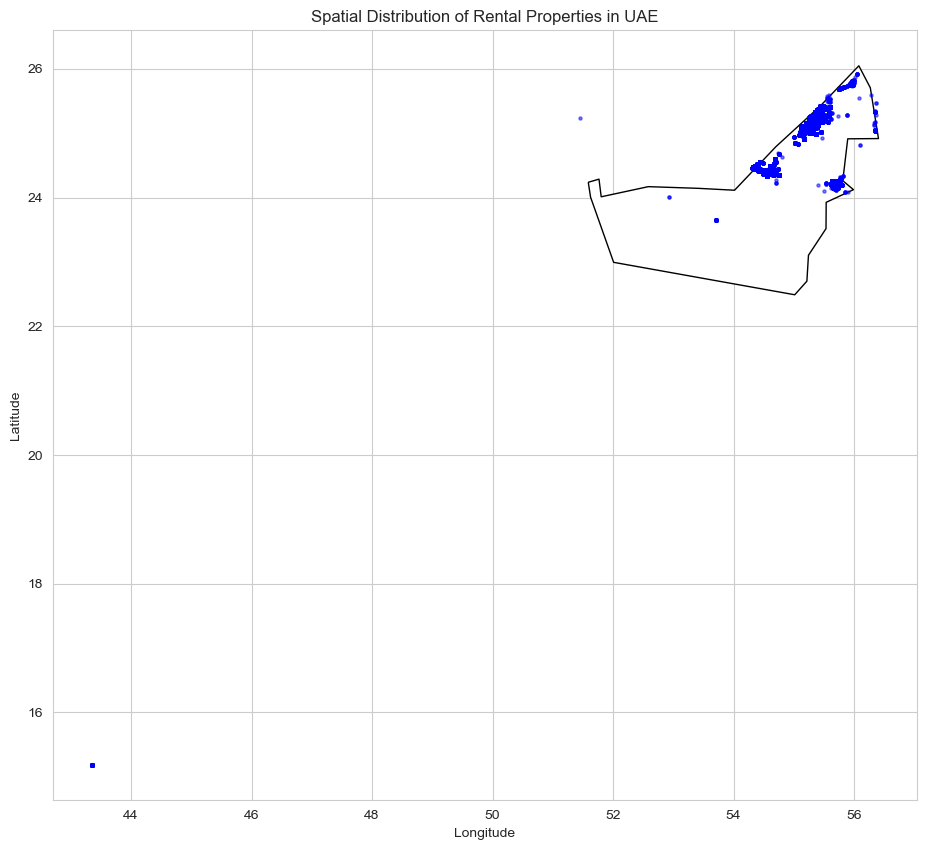

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 确保数据具有有效的坐标
valid_data = data[(data['Latitude'] != 0) & (data['Longitude'] != 0)]

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(valid_data, geometry=gpd.points_from_xy(valid_data.Longitude, valid_data.Latitude))

# 设置CRS为WGS84
gdf.set_crs(epsg=4326, inplace=True)

# 绘制
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.name == 'United Arab Emirates'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='blue', markersize=5, alpha=0.5)
plt.title('Spatial Distribution of Rental Properties in UAE')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_17620\2024806443.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_trend = data['Rent'].resample('M').mean()


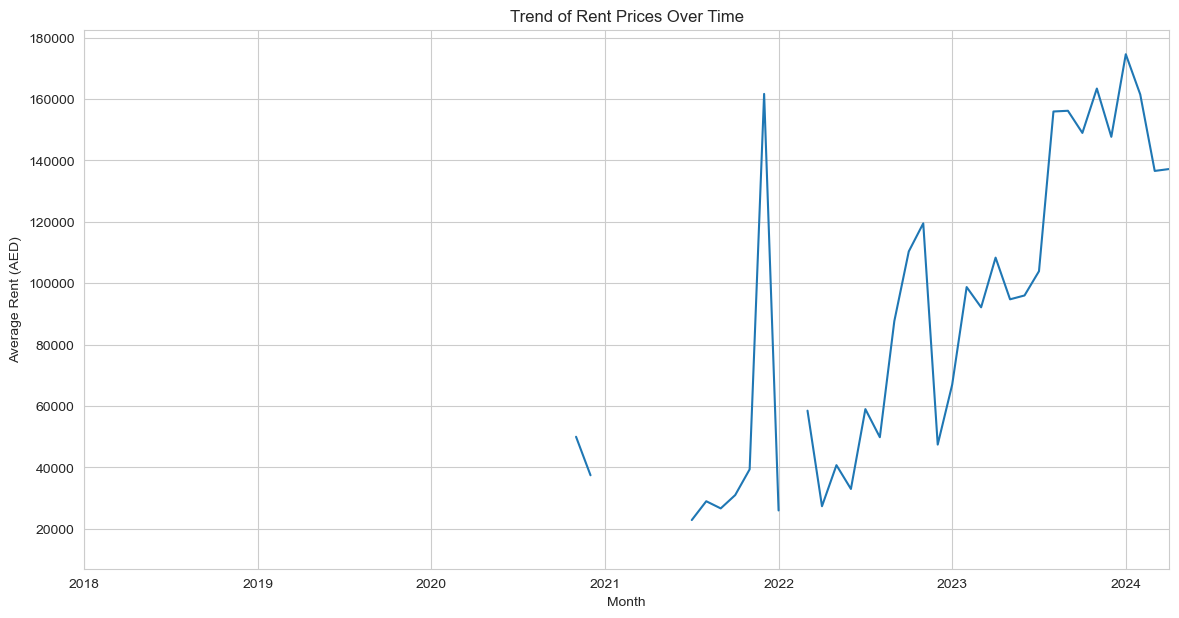

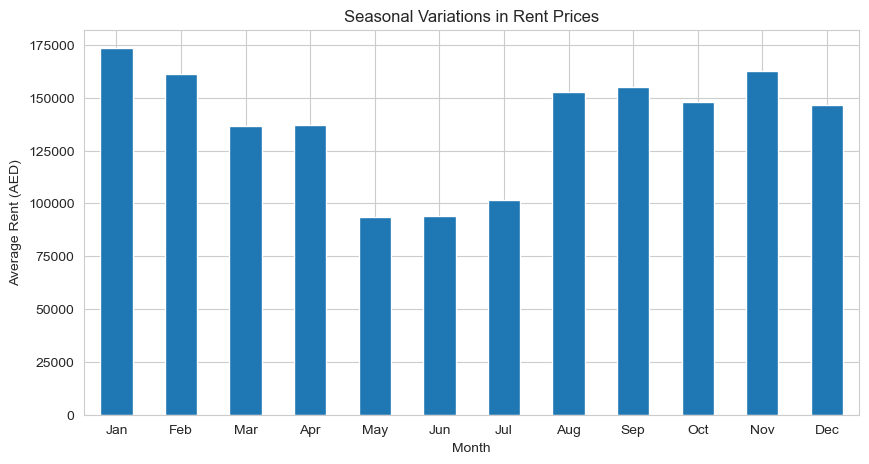

In [13]:
# 将'Posted_date'转换为datetime格式，用于基于时间的分析
data['Posted_date'] = pd.to_datetime(data['Posted_date'])

# 设置'Posted_date'作为数据框的索引
data.set_index('Posted_date', inplace=True)

# 将数据重新采样到每月频率，并计算平均租金
monthly_rent_trend = data['Rent'].resample('M').mean()

# 绘制租金价格随时间变化的趋势
plt.figure(figsize=(14, 7))
monthly_rent_trend.plot()
plt.title('Trend of Rent Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rent (AED)')
plt.grid(True)
plt.show()

# 分析租金价格的季节性变化
monthly_seasonal_variation = data['Rent'].groupby(data.index.month).mean()

# 绘制季节变化
plt.figure(figsize=(10, 5))
monthly_seasonal_variation.plot(kind='bar')
plt.title('Seasonal Variations in Rent Prices')
plt.xlabel('Month')
plt.ylabel('Average Rent (AED)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# 编码分类变量
label_encoders = {}
for column in ['Address', 'Type', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Location', 'City']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 准备特征和目标变量
data.dropna(inplace=True)
X = data.drop('Rent', axis=1)
y = data['Rent']

from sklearn.preprocessing import StandardScaler
# 使用标准归一化器
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

y_from_to_frame = y.to_frame()
y_scaled = standard_scaler.fit_transform(y_from_to_frame)

# 将数据分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 初始化并训练XGBoost回归器
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# 在测试集上预测
y_pred = xgb_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

XGBoost Model Performance:
Mean Squared Error: 0.031206719992263997
Root Mean Squared Error: 0.17665423853466974
R^2 Score: 0.9619905787374663


Linear Regression Model Performance:
Mean Squared Error: 0.45144680359789313
Root Mean Squared Error: 0.6718979115891738
R^2 Score: 0.45014305445012104

Decision Tree Regressor Model Performance:
Mean Squared Error: 0.11027563814152463
Root Mean Squared Error: 0.33207775917926907
R^2 Score: 0.8656855579133278

XGBoost Model Performance (from previous task):
Mean Squared Error: 0.031206719992263997
Root Mean Squared Error: 0.17665423853466974
R^2 Score: 0.9619905787374663


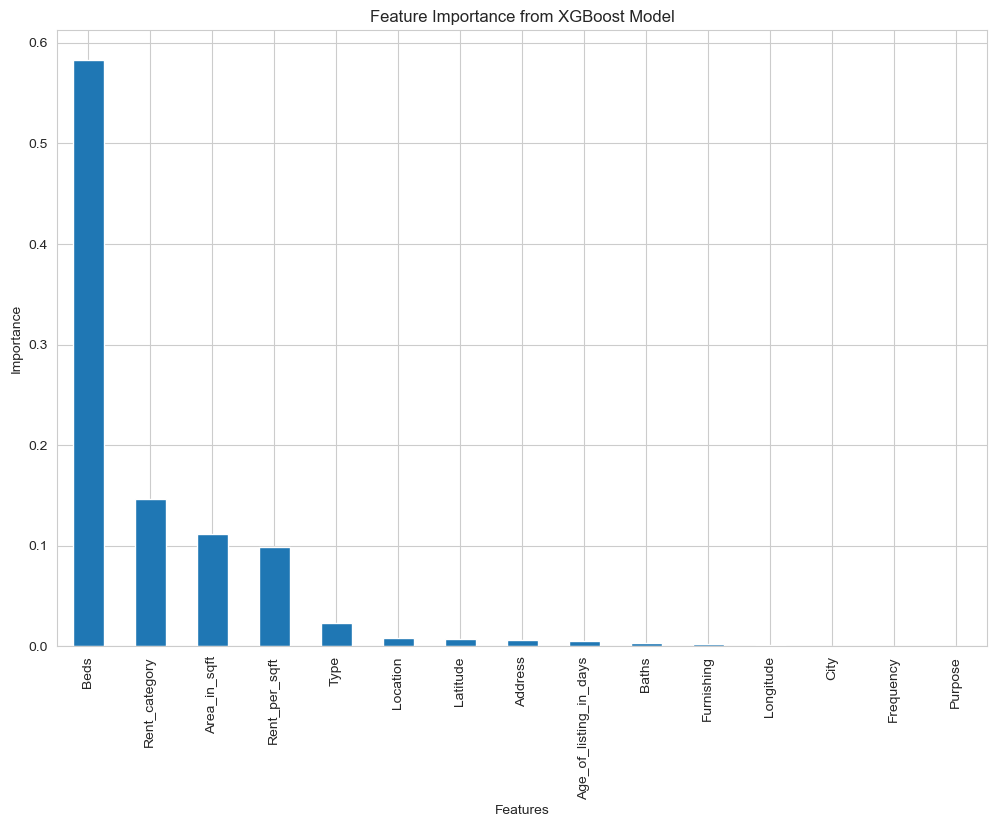

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 训练一个线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 训练一个决策树回归模型
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# 打印所有模型的性能指标
print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R^2 Score:", r2_lr)

print("\nDecision Tree Regressor Model Performance:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)

print("\nXGBoost Model Performance (from previous task):")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

# 查看起主要作用的特征
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()